In [1]:
'''
Aim: check the expression level of interferon lambda in different cell types
Author:Yike Xie
Date: Mar 2023
'''

'\nAim: get differential expressed interactions\nAuthor:Yike Xie\nDate: Jan 2023\n'

In [1]:
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import gridspec
from matplotlib import rcParams

import seaborn as sns
import scanpy as sc
import os

In [2]:
import sys
sys.path.append('/home/yike/phd/dengue/dengue_children/paper_figures/final/modules') 
import YK_util, optimized_pair_comparison, functions_CCC_figure_fra_pair
from YK_util import *
from optimized_pair_comparison import *
from functions_CCC_figure_fra_pair import *

In [3]:
# load data
path = '/home/yike/phd/dengue/data/mergedata_luca_NKT_202206.h5ad'
adata = sc.read_h5ad(path)
adata_kid = subsetdata(adata)
adata_kid = normalizedata(adata_kid, log1p=True) # log1p = 2
adata_kid = removegenes(adata_kid)
adata_kid = adata_kid[(adata_kid.obs.cell_subtype_new != 'doublets') & 
                        (adata_kid.obs.cell_subtype_new != 'unknown')].copy()

sc.pp.filter_genes(adata_kid, min_cells=3)

# exclude 1_075_01
adata_kid = adata_kid[~ (adata_kid.obs['ID'] == '1_075_01')]

/home/yike/.conda/envs/scanpy/lib/python3.8/site-packages/anndata/_core/anndata.py:1095: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  df_sub[k].cat.remove_unused_categories(inplace=True)
/home/yike/.conda/envs/scanpy/lib/python3.8/site-packages/anndata/_core/anndata.py:1095: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  df_sub[k].cat.remove_unused_categories(inplace=True)
/home/yike/.conda/envs/scanpy/lib/python3.8/site-packages/anndata/_core/anndata.py:1095: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  df_sub[k].cat.remove_unused_categories(inplace=True)


In [5]:
#rename and reorder some celltypes 
adata_kid = adata_kid.copy()
reorg_data(adata_kid) # 'cell_type_new', 'cell_subtype_new'

/home/yike/phd/dengue/dengue_children/paper_figures/final/modules/YK_util.py:172: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  adata.obs['cell_type_new'].cat.reorder_categories(group_order_primary, inplace=True)
/home/yike/phd/dengue/dengue_children/paper_figures/final/modules/YK_util.py:204: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  adata.obs['cell_subtype_new'].cat.reorder_categories(group_order_secondary, inplace=True)


In [4]:
save_figures = '/home/yike/phd/dengue/figures/IFN_lambda/'

In [6]:
# get cell types and cell subtypes
cell_types = adata_kid.obs['cell_type_new'].unique().tolist()
cell_subtypes = adata_kid.obs['cell_subtype_new'].unique().tolist()

In [7]:
# load cell type palette
ct_palette = load_ct_palette()
print([ct for ct in ct_palette.keys()])
sns.color_palette(ct_palette.values())

['B cells', 'Plasmablasts', 'T cells', 'NK cells', 'Monocytes', 'conventional DCs', 'plasmacytoid DCs', 'megakaryocytes']


[(0.8352941176470589, 0.3686274509803922, 0.0),
 (0.8705882352941177, 0.5607843137254902, 0.0196078431372549),
 (0.00392156862745098, 0.45098039215686275, 0.6980392156862745),
 (0.8, 0.47058823529411764, 0.7372549019607844),
 (0.00784313725490196, 0.6196078431372549, 0.45098039215686275),
 (0.984313725490196, 0.6862745098039216, 0.8941176470588236),
 (0.792156862745098, 0.5686274509803921, 0.3803921568627451),
 (0.5803921568627451, 0.5803921568627451, 0.5803921568627451)]

In [8]:
# load cell subtype palette
cst_palette = load_cst_palette()
print([cst for cst in cst_palette.keys()])
sns.color_palette(cst_palette.values())

['memory B cells', 'naive B cells', 'activated B cells', 'proliferating plasmablasts', 'non-proliferating plasmablasts', 'CD4+ naive T cells', 'CD4+ memory T cells', 'CD8+ naive T cells', 'CD8+ effector memory T cells', 'CD8+ exhausted T cells', 'Tregs', 'MAIT', 'signaling NK cells', 'cytotoxic NK cells', 'proliferating NK cells', 'classical monocytes', 'non-classical monocytes', 'intermediate monocytes', 'cDC1', 'cDC2', 'pDCs', 'megakaryocytes']


[(1.0, 0.0, 0.0),
 (0.7372549019607844, 0.5607843137254902, 0.5607843137254902),
 (0.5019607843137255, 0.0, 0.0),
 (1.0, 0.8941176470588236, 0.7686274509803922),
 (1.0, 0.5490196078431373, 0.0),
 (0.6901960784313725, 0.7686274509803922, 0.8705882352941177),
 (0.4392156862745098, 0.5019607843137255, 0.5647058823529412),
 (0.0, 0.0, 0.5019607843137255),
 (0.2549019607843137, 0.4117647058823529, 0.8823529411764706),
 (0.0, 0.7490196078431373, 1.0),
 (0.0, 1.0, 1.0),
 (0.37254901960784315, 0.6196078431372549, 0.6274509803921569),
 (0.5019607843137255, 0.0, 0.5019607843137255),
 (0.8666666666666667, 0.6274509803921569, 0.8666666666666667),
 (1.0, 0.0, 1.0),
 (0.5607843137254902, 0.7372549019607844, 0.5607843137254902),
 (0.5647058823529412, 0.9333333333333333, 0.5647058823529412),
 (0.0, 0.5019607843137255, 0.0),
 (1.0, 0.7529411764705882, 0.796078431372549),
 (1.0, 0.0784313725490196, 0.5764705882352941),
 (0.792156862745098, 0.5686274509803921, 0.3803921568627451),
 (0.5803921568627451, 0.5803921568627451, 0.5803921568627451)]

In [21]:
def com_mushrooms(genes, cst_plots, vmax=3):

    from matplotlib.patches import Wedge
    import matplotlib.pyplot as plt
    import matplotlib as mpl
    import math
    import numpy as np
    import pandas as pd
    import itertools

    conditions = ['SD', 'N']
    cmap = plt.cm.get_cmap('viridis')
    vmin = -1
    # vmax = 3
    threshold = 0.2

    #save_tabels = '/home/yike/phd/dengue/data/tables/dataset_20211001/'
    frac_ct = pd.read_csv('/home/yike/phd/dengue/docs/paper_draft/tabels/exclude_1_075_01/ct_fra.tsv', 
                         sep='\t', index_col=['cell_type_new', 'condition', 'gene']).squeeze(1)
    avg_ct = pd.read_csv('/home/yike/phd/dengue/docs/paper_draft/tabels/exclude_1_075_01/ct_avg.tsv', 
                         sep='\t', index_col=['cell_type_new', 'condition', 'gene']).squeeze(1)

    frac_cst = pd.read_csv('/home/yike/phd/dengue/docs/paper_draft/tabels/exclude_1_075_01/cst_fra.tsv', 
                          sep='\t', index_col=['cell_subtype_new', 'condition', 'gene']).squeeze(1)
    avg_cst = pd.read_csv('/home/yike/phd/dengue/docs/paper_draft/tabels/exclude_1_075_01/cst_avg.tsv', 
                          sep='\t', index_col=['cell_subtype_new', 'condition', 'gene']).squeeze(1)

    if len(cst_plots) < 5:
        length = 5
    else:
        length = len(cst_plots)

    fig = plt.figure(figsize=(2 + 0.5 * len(genes), 1 + length * 0.6), dpi=300)
    grid = plt.GridSpec(1 , len(genes) + 1, wspace=0.15, hspace=0.1)

    # fig, axs = plt.subplots(1, len(genes) + 1, 
    #                         figsize=((1 + 0.48 * len(genes)), (1 + length)* 0.6), dpi=300)

    cell_types = ['Monocytes', 'NK cells', 'Plasmablasts', 'B cells', 'T cells', 
                  'conventional DCs', 'plasmacytoid DCs','megakaryocytes', ]

    cell_subtypes = [
                     'classical monocytes',
                     'non-classical monocytes',
                     'intermediate monocytes',

                     'cytotoxic NK cells',
                     'signaling NK cells',

                     'proliferating plasmablasts',
                     'non-proliferating plasmablasts',

                     'naive B cells',
                     'memory B cells',
                     'activated B cells',

                     'CD4+ naive T cells',
                     'CD4+ memory T cells',
                     'CD8+ naive T cells',
                     'CD8+ effector memory T cells',
                     'CD8+ exhausted T cells',
                     'MAIT',
                     'Tregs',

                     'cDC1',
                     'cDC2',
                     'pDCs',]
    
    axs = []
    for i in range(len(genes)):
         axs.append(plt.subplot(grid[0: len(cst_plots), i: i+1]))

    axs.append(plt.subplot(grid[0: 5, len(genes): len(genes) + 1])) # size_bar

    for gene, ax in zip(genes, axs[:-1]):
        datap = []
        yticklabels = []
        for cst in cst_plots:
            avgs = []
            yticklabels.append(cst.replace('_', ' '))
            for k, cond in enumerate(conditions):
                if cst in cell_types:
                    fr = frac_ct.loc[(cst, cond, gene)]
                    av = np.log10(avg_ct.loc[(cst, cond, gene)] + 0.1)
                elif cst in cell_subtypes:
                    fr = frac_cst.loc[(cst, cond, gene)]
                    av = np.log10(avg_cst.loc[(cst, cond, gene)] + 0.1)
                avgs.append(av)
                r = 0.5 * fr**0.3
                color = cmap((min(vmax, av) - vmin) / (vmax - vmin))
                theta0, theta1 = 180 * (k > 0), 180 + 180 * (k > 0)
                datap.append({
                    'r': r,
                    'facecolor': color,
                    'center': (0, len(yticklabels)-1),
                    'theta': (theta0, theta1),
                    'ax': ax,
                })
            if avgs[0] - avgs[1] > threshold:
                datap[-2]['edgecolor'] = 'red'
                datap[-1]['edgecolor'] = 'none'
            elif avgs[0] - avgs[1] < -threshold:
                datap[-1]['edgecolor'] = 'red'
                datap[-2]['edgecolor'] = 'none'
            else:
                datap[-1]['edgecolor'] = 'none'
                datap[-2]['edgecolor'] = 'none'   

        ax.set_title(gene, fontsize=8)

        if ax == axs[0]:
            ax.set_yticks(np.arange(len(cst_plots)))
            ax.set_yticklabels(yticklabels, fontsize=10)
        else:
            ax.set_yticks([])
            ax.set_yticklabels([])

        ax.set_ylim(-0.6, len(cst_plots) - 0.4)        
        ax.set_xticks([])
        ax.set_xlim(-0.6, 1 - 0.4)

        for datum in datap:
            ax = datum['ax']
            r = datum['r']
            color = datum['facecolor']
            center = datum['center']
            theta0, theta1 = datum['theta']
            ec = datum['edgecolor']

            h = Wedge(
                center, r, theta0, theta1, facecolor=color, edgecolor=ec
            )
            ax.add_artist(h)
            ax.set_aspect(1)

    axs[-1].set_ylim(-0.6, 5 - 0.4)        
    c = [(0.5, i) for i in range(5)]
    radius = [0.5 * fr**0.3 for fr in [0.05, 0.1, 0.2, 0.4, 0.8]]
    for c, r in zip(c, radius):
        e = Wedge(c, r, 0, 180, facecolor='gray',)
        axs[-1].add_artist(e)
    axs[-1].set_aspect(1)
    axs[-1].set_yticks([])
    axs[-1].set_yticks(range(5))
    axs[-1].set_yticklabels(['5', '10', '20', '40', '80'])
    axs[-1].yaxis.tick_right()
    axs[-1].yaxis.set_label_position('right')
    axs[-1].set_ylabel('Gene exp frac')
    axs[-1].set_xticks([])
    axs[-1].spines['bottom'].set_visible(False)
    axs[-1].spines['top'].set_visible(False)
    axs[-1].spines['right'].set_visible(False)
    axs[-1].spines['left'].set_visible(False)

    norm = mpl.colors.Normalize(vmin=vmin, vmax=vmax) 
    cmap = plt.cm.get_cmap('viridis')
    position = fig.add_axes([0.98, 0.4, 0.01, 0.3]) 
    # The dimensions [left, bottom, width, height] of the new Axes.
    # All quantities are in fractions of figure width and height.
    cbar = plt.colorbar(plt.cm.ScalarMappable(norm=norm, cmap=cmap), ax=axs[-1], cax=position, 
                        label='Gene exp \n(log10[cpm+0.1])')

    fig.tight_layout()
    
    return {'figure': fig, 'axs': axs}

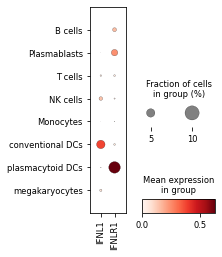

In [30]:
# Interferon lambdas (IFN-λs; IFNL1-4)
genes = ['IFNL1', 'IFNLR1']
fig = sc.pl.dotplot(adata_kid, genes, groupby='cell_type_new', return_fig=True)
fig.savefig(save_figures + 'cell_type_all_cds.png', dpi=150, bbox_inches='tight')

/home/yike/.conda/envs/scanpy/lib/python3.8/site-packages/scanpy/plotting/_dotplot.py:749: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


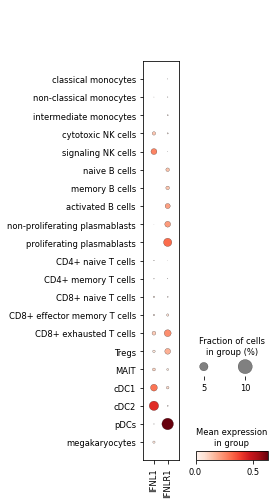

In [32]:
# Interferon lambdas (IFN-λs; IFNL1-4)
genes = ['IFNL1', 'IFNLR1']
fig = sc.pl.dotplot(adata_kid, genes, groupby='cell_subtype_new', return_fig=True)
fig.savefig(save_figures + 'cell_subtype_all_cds.png', dpi=150, bbox_inches='tight')

<ipython-input-21-d815bbea57f8>:163: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


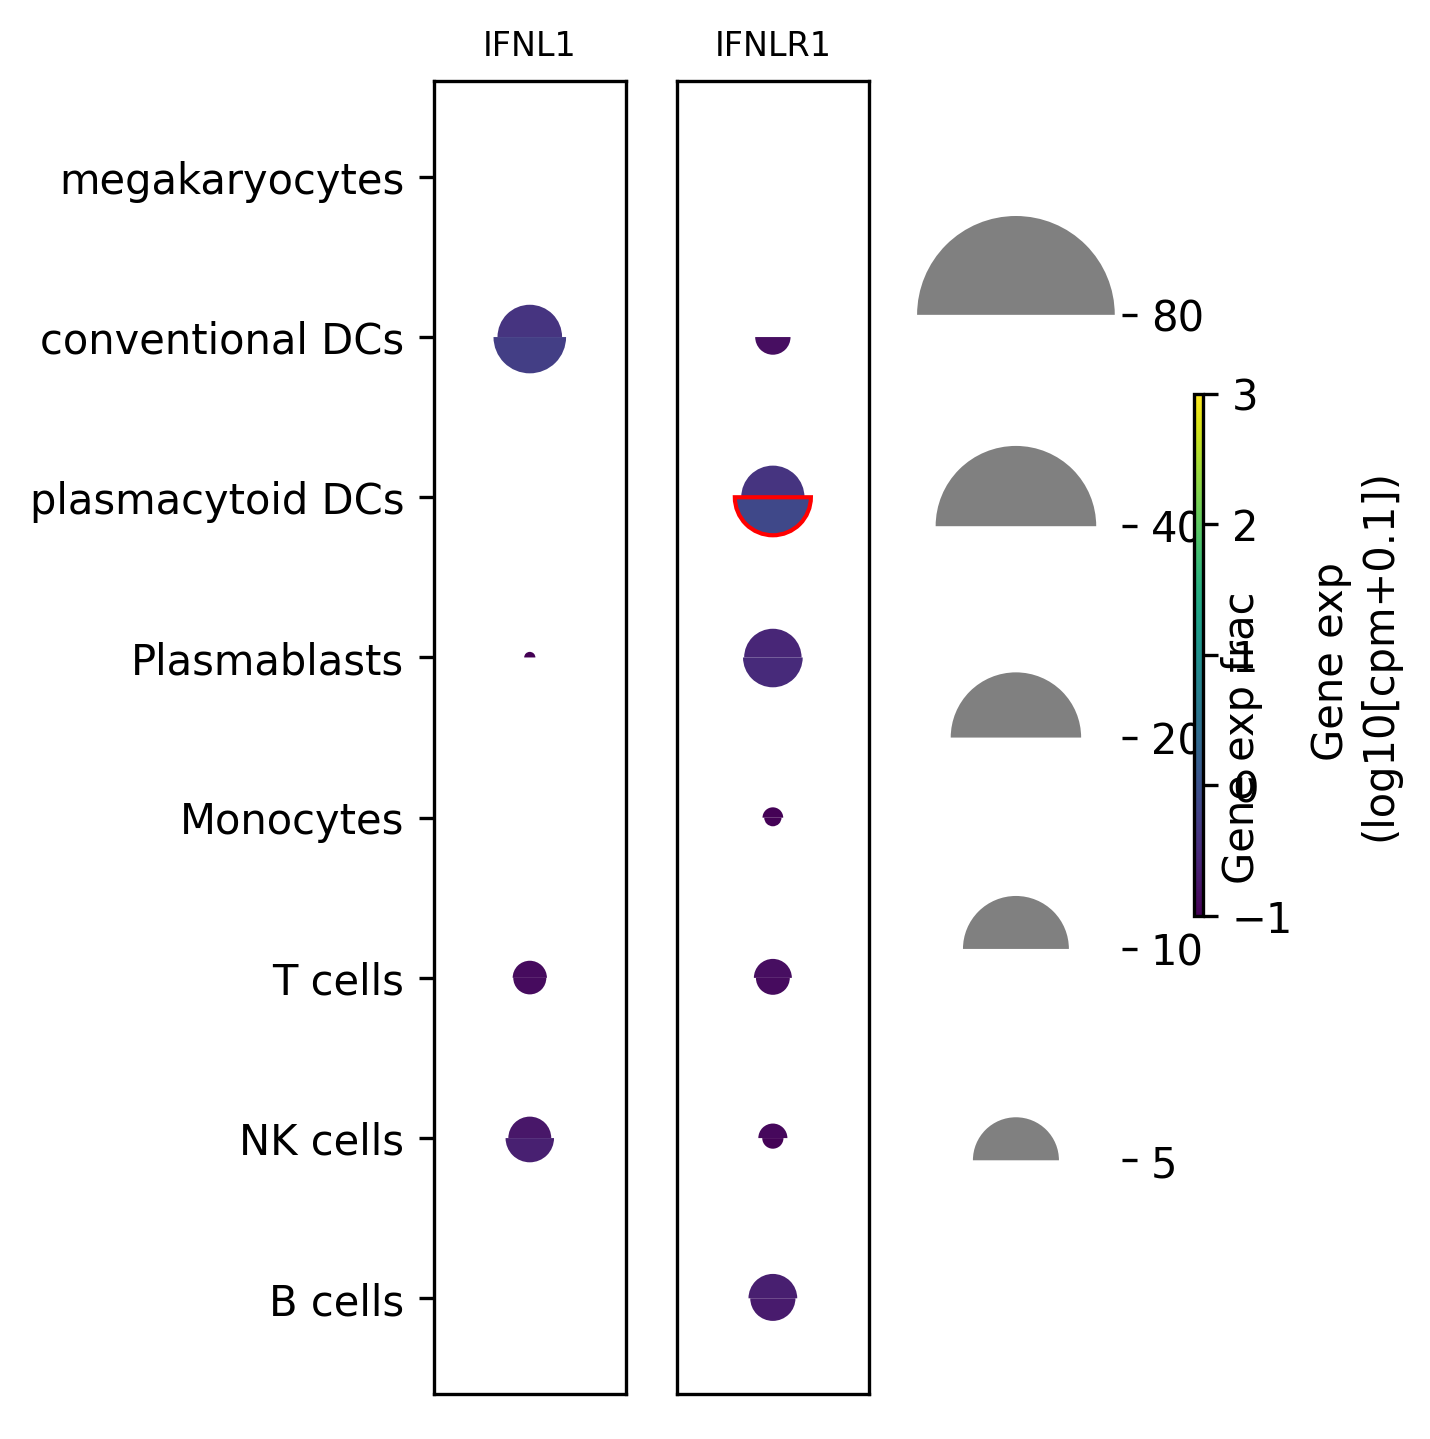

In [34]:
fig1 = com_mushrooms(genes, 
              cell_types, vmax=3)['figure']
fig1.savefig(save_figures + 'cell_type_SD_D.svg')

<ipython-input-21-d815bbea57f8>:163: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


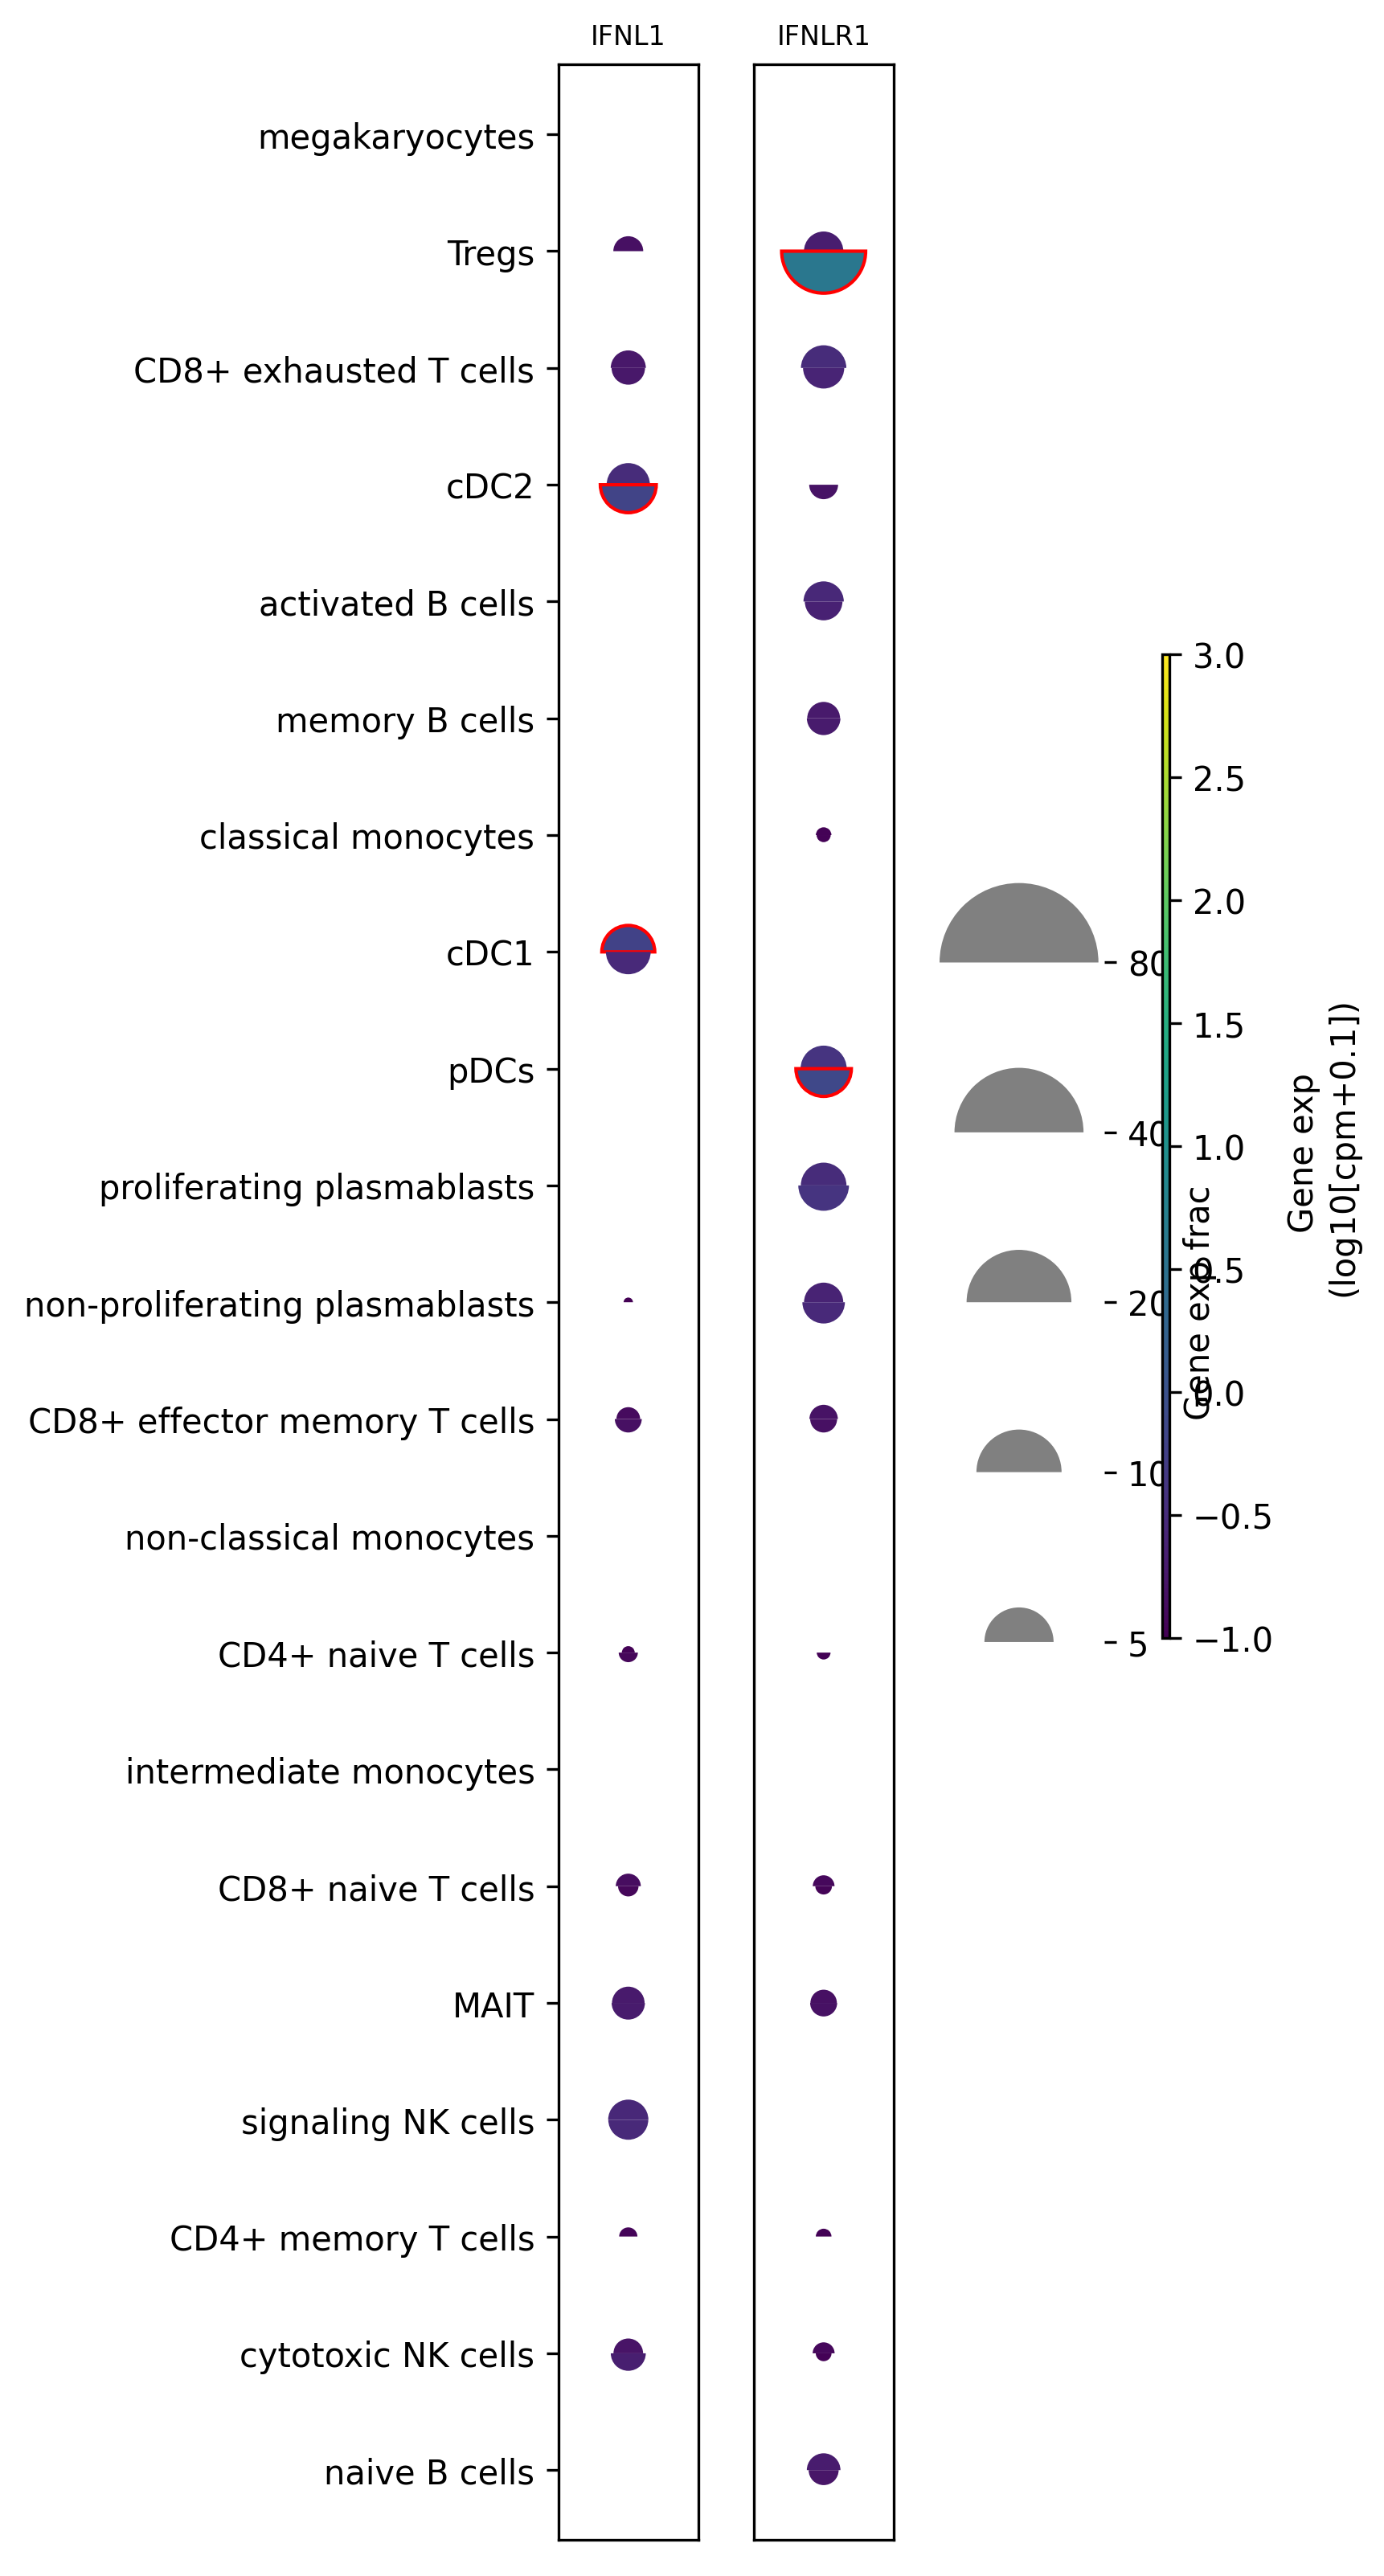

In [35]:
fig2 = com_mushrooms(genes, 
              cell_subtypes, vmax=3)['figure']
fig2.savefig(save_figures + 'cell_subtype_SD_D.svg')